## Importing Libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [76]:
data = pd.read_csv("Downloads/Graduate Admission.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,0.92,1
1,2,324,107,4,4.0,4.5,8.87,0.76,1
2,3,316,104,3,3.0,3.5,8.00,0.72,1
3,4,322,110,3,3.5,2.5,8.67,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0.65,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,0.82,1
396,397,325,107,3,3.0,3.5,9.11,0.84,1
397,398,330,116,4,5.0,4.5,9.45,0.91,1
398,399,312,103,3,3.5,4.0,8.78,0.67,0


## Finding NULL Values

In [71]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit                0
dtype: int64

In [72]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.724350,0.547500
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.142609,0.498362
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.340000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.640000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,0.730000,1.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,0.830000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,0.970000,1.000000


In [92]:
data.drop("Serial No.",axis=1,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Admit,Research
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0


In [81]:
data = data.rename(columns={'Admit':'Research','Research':'Admit'})
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Admit,Research
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0


## Visualisation

In [93]:
gre_score = data[["GRE Score"]] 
toefl_score = data[["TOEFL Score"]] 
uni_rating= data[["University Rating"]]

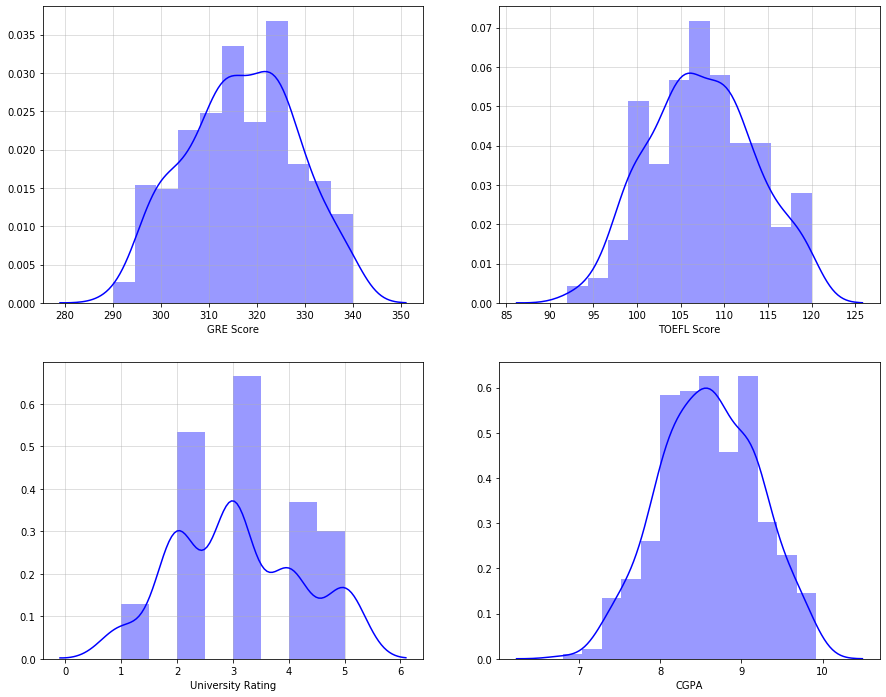

In [131]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.distplot(data['GRE Score'], color='blue')
plt.grid(alpha=0.5)

plt.subplot(2,2,2)
sns.distplot(data['TOEFL Score'], color='blue')
plt.grid(alpha=0.5)

plt.subplot(2,2,3)
sns.distplot(data['University Rating'], color='blue')
plt.grid(alpha=0.5)

plt.subplot(2,2,4)
sns.distplot(data['CGPA'], color='blue')

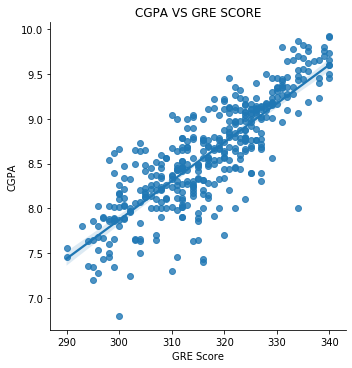

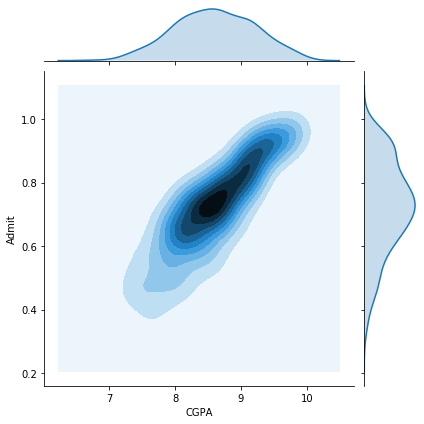

In [95]:
fig=sns.lmplot(x='GRE Score',y='CGPA',data=data)
plt.title("CGPA VS GRE SCORE")
plt.show()


fig=sns.jointplot(x='CGPA',y='Admit',data=data,kind='kde')
plt.show()

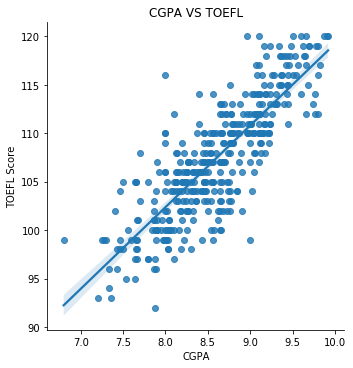

In [96]:
fig=sns.lmplot(x='CGPA',y='TOEFL Score',data=data)
plt.title("CGPA VS TOEFL")
plt.show()

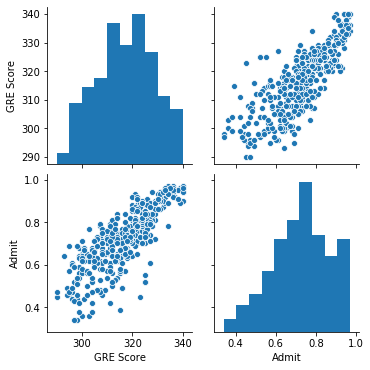

In [97]:
sns.pairplot(data=data,vars=["GRE Score","Admit"])
plt.show()

In [132]:
gre_avg = data['GRE Score'].mean()
gre_std = data['GRE Score'].std()
print("Maximum GRE Score : 340")
print("Average GRE Score : ",gre_avg)
print("Standard Deaviation : ",gre_std)

diff = data['GRE Score']-gre_avg
data['SD_GRE'] = diff/gre_std

Maximum GRE Score : 340
Average GRE Score :  316.8075
Standard Deaviation :  11.473646113500477


In [134]:
toefl_avg = data['TOEFL Score'].mean()
toefl_std = data['TOEFL Score'].std()
print("Maximum TOEFL Score : 120")
print("Average TOEFL Score : ",toefl_avg)
print("Standard Deaviation : ",toefl_std)

diff = data['TOEFL Score']-toefl_avg
data['SD_TOEFL'] = diff/toefl_std

Maximum TOEFL Score : 120
Average TOEFL Score :  107.41
Standard Deaviation :  6.069513777374129


In [135]:
cgpa_avg = data['CGPA'].mean()
cgpa_std = data['CGPA'].std()
print("Maximum CGPA Score : 10")
print("Average CGPA Score : ",cgpa_avg)
print("Standard Deaviation : ",cgpa_std)

diff = data['CGPA']-cgpa_avg
data['SD_CGPA'] = diff/cgpa_std

Maximum CGPA Score : 10
Average CGPA Score :  8.598924999999998
Standard Deaviation :  0.5963170964964317


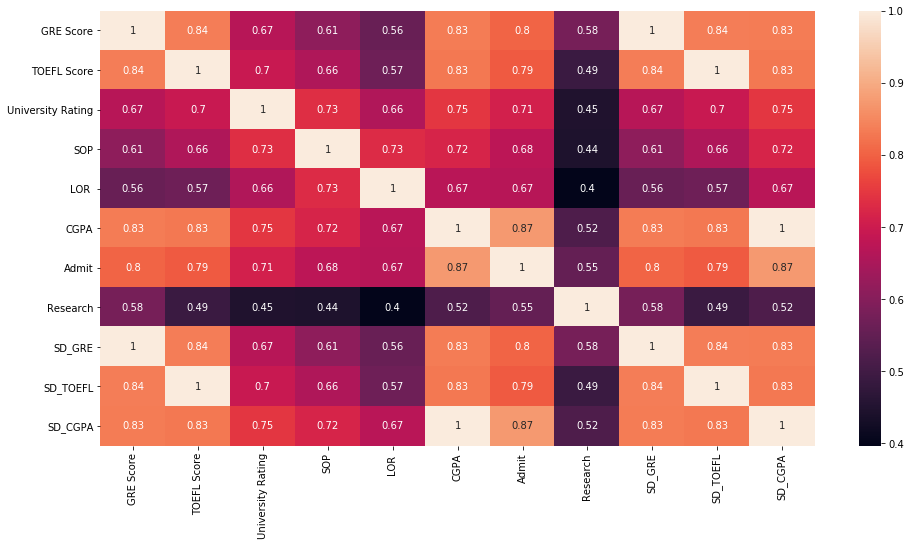

In [136]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True)

## Splitting Data for Tranning and Testing

In [139]:
x=data.drop('Admit',axis=1)
y=data['Admit']
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2)

In [141]:
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(x_train,y_train)

## Testing The Data

In [142]:
model = LinearRegression(normalize=True)
model.fit(x_test, y_test)
model.score(x_test, y_test)

0.887599722860324

## Predecting The Data

In [143]:
pred = model.predict(x_test)

In [145]:
model.intercept_

37833874557938.17

In [146]:
model.coef_

array([-8.55125100e+10,  1.38184912e+09,  1.56514326e-02, -1.81954160e-02,
        2.62303358e-02, -1.26658791e+12, -5.57786058e-03,  9.81140278e+11,
       -8.38715226e+09,  7.55288025e+11])

## Checking the score with Adjusted R2

In [144]:
r2_score(y_test,pred)

0.887599722860324